<h4>imports</h4>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import (DecisionTreeClassifier,
                            DecisionTreeRegressor,
                            export_graphviz)
from sklearn.datasets import make_blobs,load_breast_cancer

In [3]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

NOISE = 0.1
N_SAMPLES =1000
ALPHA=0.001     #learning rate
TEST_SIZE=0.2

In [4]:
params = {
    'legend.fontsize': 'small',
    'figure.figsize': (15,5),
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'savefig.dpi': 75,
    'image.interpolation': 'none',
    'savefig.bbox': 'tight',
    'lines.linewidth': 1,
    'legend.numpoints': 1,
}

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

plt.style.use('seaborn-v0_8-darkgrid')

<Figure size 1500x500 with 0 Axes>

<h4>Helper dedo</h4>

In [6]:
def fn_plot_decision_boundry(clf,X1,y1,ax=None):
    '''
    Args : 
        clf: classifier
        X1: np.ndarray - Feature matrix
        y1: np.ndarray - lables/target
        ax: matplotlib axis object
       
    '''

    #make sure matplotlib axis exists
    if ax is None:
        ax= plt.gca()
    #generate grid for contours   
    dm = 0.05 #grid spacing

    x_min, x_max =X1[:,0].min()-0.05,X1[:,0].max()+0.05 #col1
    y_min, y_max =X1[:,1].min()-0.05,X1[:,1].max()+0.05 #col2 

    #Create a meshgrid
    xx, yy= np.meshgrid(np.arange(x_min, x_max, dm),
                   np.arange(y_min, y_max, dm))
    # Stack them
    XX = np.c_[xx.ravel(), yy.ravel()]

    #make predication 
    y_pred = clf.predict(XX)

    # Assign predication to the respect point
    Z = y_pred.reshape(xx.shape)

    ax.contourf(xx,yy, Z, alpha = 0.6, cmap =CMAP)

    ax.scatter(X1[:, 0],X1[:, 1], c = y1, s = 20,
              edgecolor = 'k', cmap = CMAP)
    return 

<h4>Data</h4>

In [8]:
X, y =make_blobs(n_samples=600, centers=4, random_state=0, cluster_std=0.6)
X.shape, y.shape

((600, 2), (600,))

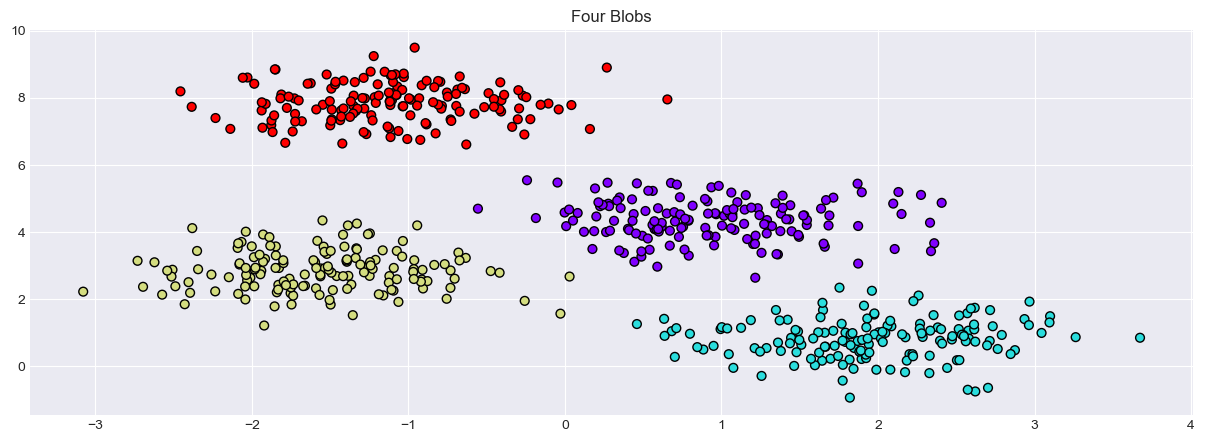

In [9]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y , s=40, cmap=CMAP, edgecolors='k')

ax.set_title('Four Blobs')

plt.show()

In [10]:
clf= DecisionTreeClassifier(max_depth=None)

clf.fit(X, y)

DecisionTreeClassifier()

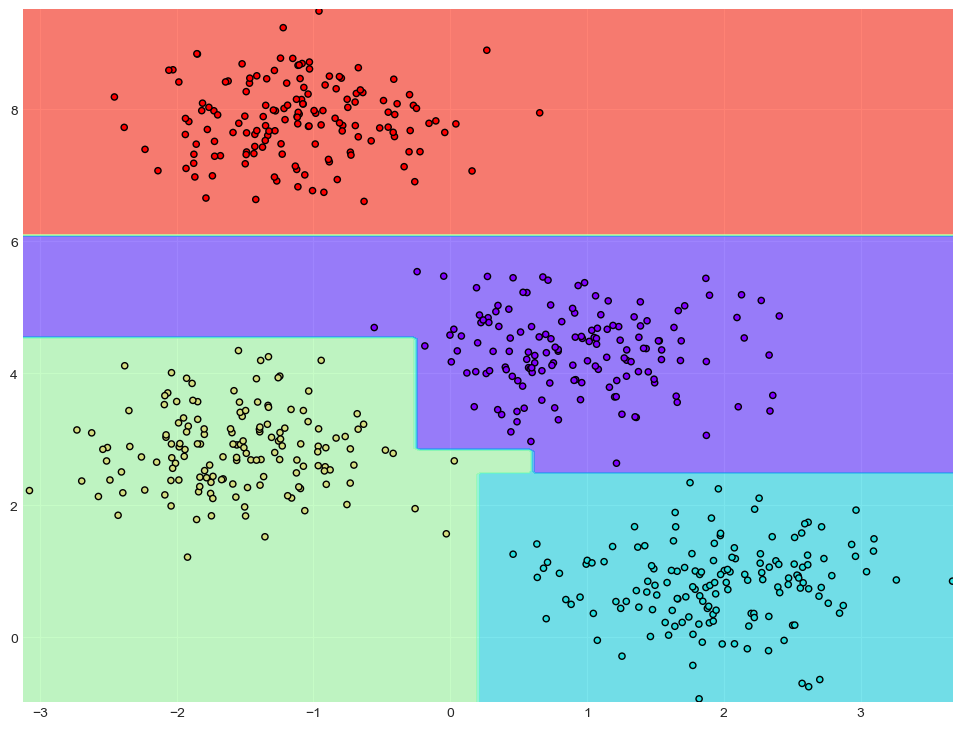

In [11]:
plt.figure(figsize=(12,9))
fn_plot_decision_boundry(clf, X , y)

In [12]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [14]:
X_train ,X_test, y_train, y_test = train_test_split(data.data, #x_DATA
                                                   data.target, #y_DATA
                                                   test_size=TEST_SIZE,
                                                   stratify=data.target,
                                                   random_state=RANDOM_STATE)
tree = DecisionTreeClassifier(random_state = RANDOM_STATE)


tree.fit(X_train, y_train)
print(f'Train set accuracy{tree.score(X_train, y_train): 0.4f}')
print(f'Test set accuracy{tree.score(X_test, y_test): 0.4f}')

Train set accuracy 1.0000
Test set accuracy 0.8947


In [15]:
tree = DecisionTreeClassifier(max_depth=3,random_state = RANDOM_STATE)

tree.fit(X_train, y_train)
print(f'Train set accuracy{tree.score(X_train, y_train): 0.4f}')
print(f'Test set accuracy{tree.score(X_test, y_test): 0.4f}')

Train set accuracy 0.9824
Test set accuracy 0.8860


In [28]:
export_graphviz(tree, out_file='tree.dot', class_names=['M','B'],
               feature_names=data.feature_names, impurity=False, filled=True)

'dot' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

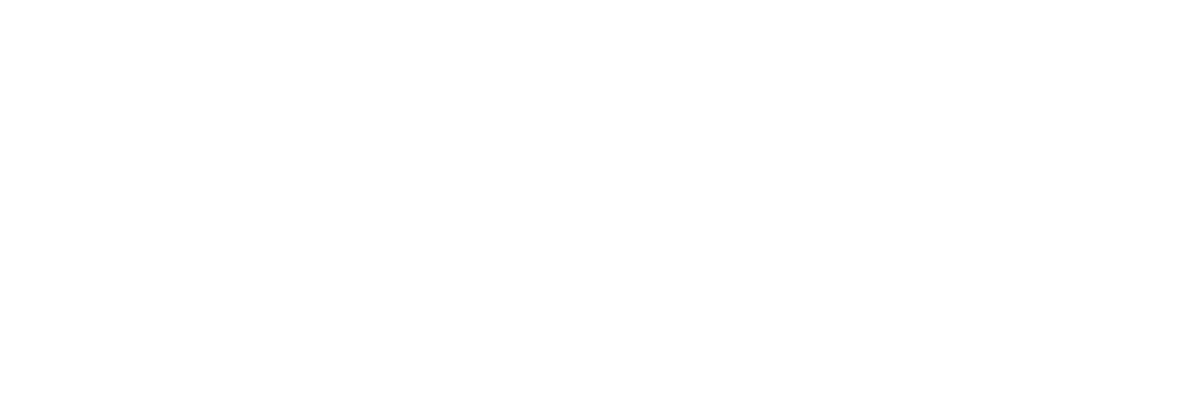

In [30]:
with open('tree.dot') as file:
    dot_graph=file.read()
img = graphviz.Source(dot_graph)
! dot -Tpng tree.dot -o tree.png

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(mpimg.imread('tree.png'));

In [32]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01003145, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.19158351, 0.        ,
       0.        , 0.01154525, 0.77726327, 0.        , 0.00957652])

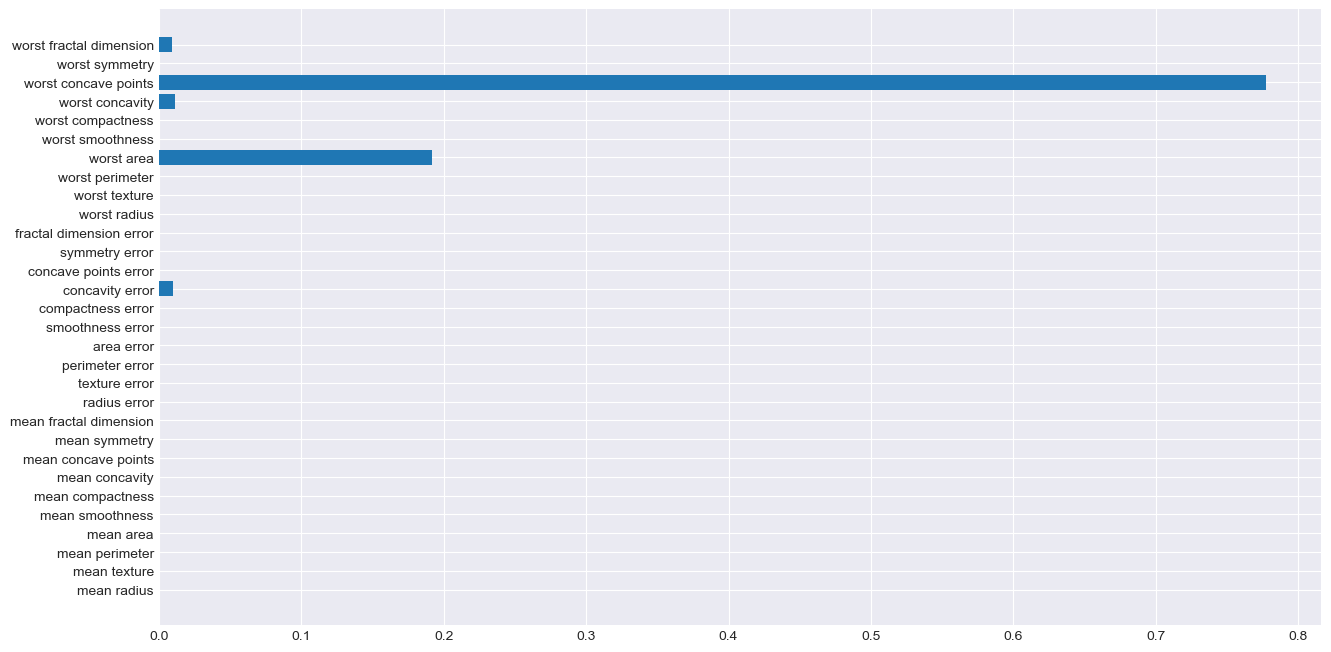

In [34]:
n_features=data.data.shape[1]

plt.figure(figsize=(15,8))
plt.barh(np.arange(n_features),tree.feature_importances_, align='center');

plt.yticks(np.arange(n_features),data.feature_names);

In [36]:
cd "Machine Learning"

[WinError 2] The system cannot find the file specified: 'Machine Learning'
C:\Users\duasp\Machine Learning


In [38]:
ram_price=pd.read_csv('ram_price.csv')

In [40]:
ram_price.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [42]:
ram_price

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


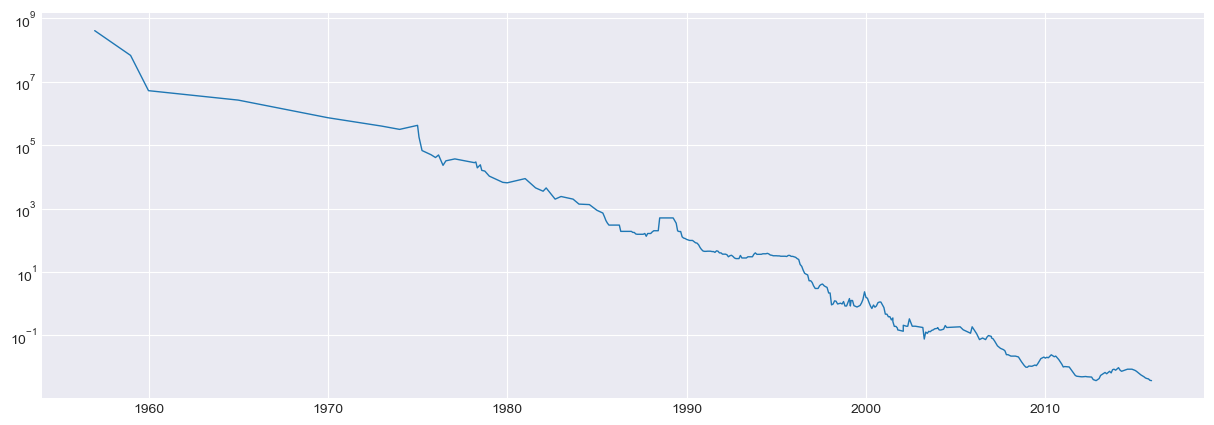

In [44]:
fig ,ax = plt.subplots()

ax.semilogy(ram_price.date, ram_price.price);

In [46]:
# spliting into train test 
data_train= ram_price [ram_price.date < 2000].copy()
data_test= ram_price [ram_price.date >= 2000].copy()

X_train = data_train.date.to_numpy()[: , np.newaxis]
y_train = np.log(data_train.price.to_numpy()) # making it linear 

tree = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)

clf = LinearRegression().fit(X_train,y_train)

X_all = ram_price.date.to_numpy()[:, np.newaxis]

pred_tree= tree.predict(X_all)

pred_lr = clf.predict(X_all)

#predictions 
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

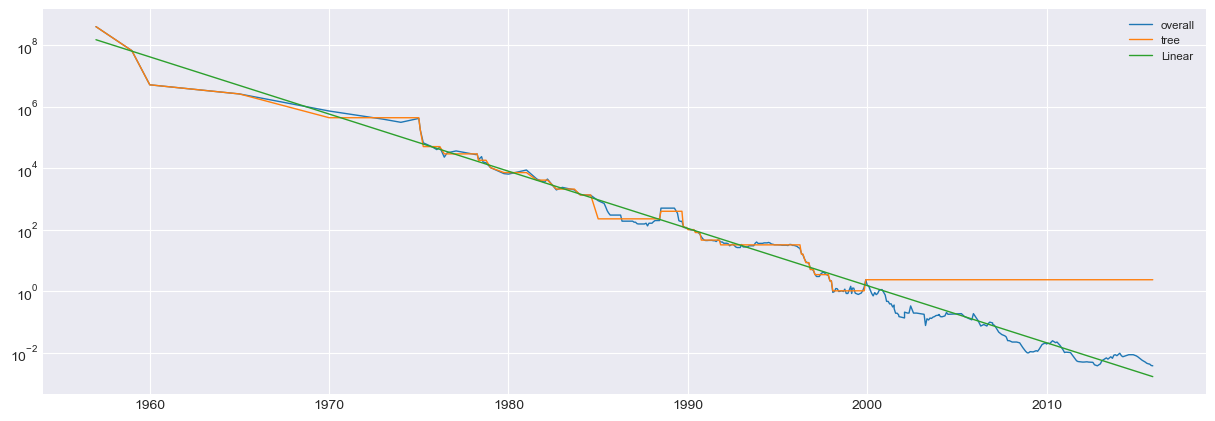

In [48]:
#plot it

fig, ax = plt.subplots()

ax.semilogy(ram_price.date, ram_price.price, label = 'overall');

ax.semilogy(ram_price.date, price_tree, label = 'tree');

ax.semilogy(ram_price.date, price_lr, label = 'Linear');

plt.legend()